# EDA - Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# 1. Problem statement and data collection

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


# 2. Exploration and data cleaning
# 2.1 Understanding the features:

In [3]:
# Obtener las dimensiones
print('Our dataframe contains {} rows, indicating the total number of rentals, and has a shape of {}.'.format(len(total_data), total_data.shape))

Our dataframe contains 3140 rows, indicating the total number of rentals, and has a shape of (3140, 108).


In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


# 2.2 Identifying Null Values and data types for each feature

In [5]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

# 2.3 Looking for duplicated and dropping them, if any.

In [6]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


# 2.4 Dealing with null values

In [7]:
#Sacamos el porcentaje de valores NaN
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

# 3. Univariate Analysis
# 3.1 Dividing our dataset into categorial and numerical.

In [8]:
#Analizamos los tipos de información que tenemos
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [25]:
keep_columns = [
    "TOT_POP", "0-9", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "R_NET_MIG_2018", "PCTPOVALL_2018",
    "MEDHHINC_2018", "Civilian_labor_force_2018", "Unemployed_2018", "Unemployment_rate_2018", "Total nurse practitioners (2019)", 
    "Total physician assistants (2019)", "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)", 
    "Family Medicine/General Practice Primary Care (2019)", "Total Specialist Physicians (2019)", 
    "Population Aged 60+", "anycondition_number", "Heart disease_number", "diabetes_number", "Obesity_number", "COPD_number", "CKD_number"
]

df_filtered = total_data[keep_columns]

In [ ]:
#Dividimos el datafram original por valores numéricos y categóricos
num = ['int64', 'float64']
cat = ['O']

df_num = total_data.select_dtypes(num)
df_cat = total_data.select_dtypes(cat)

In [10]:
df_cat.head(3)

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama


# 3.2 Categorical Variable Analysis

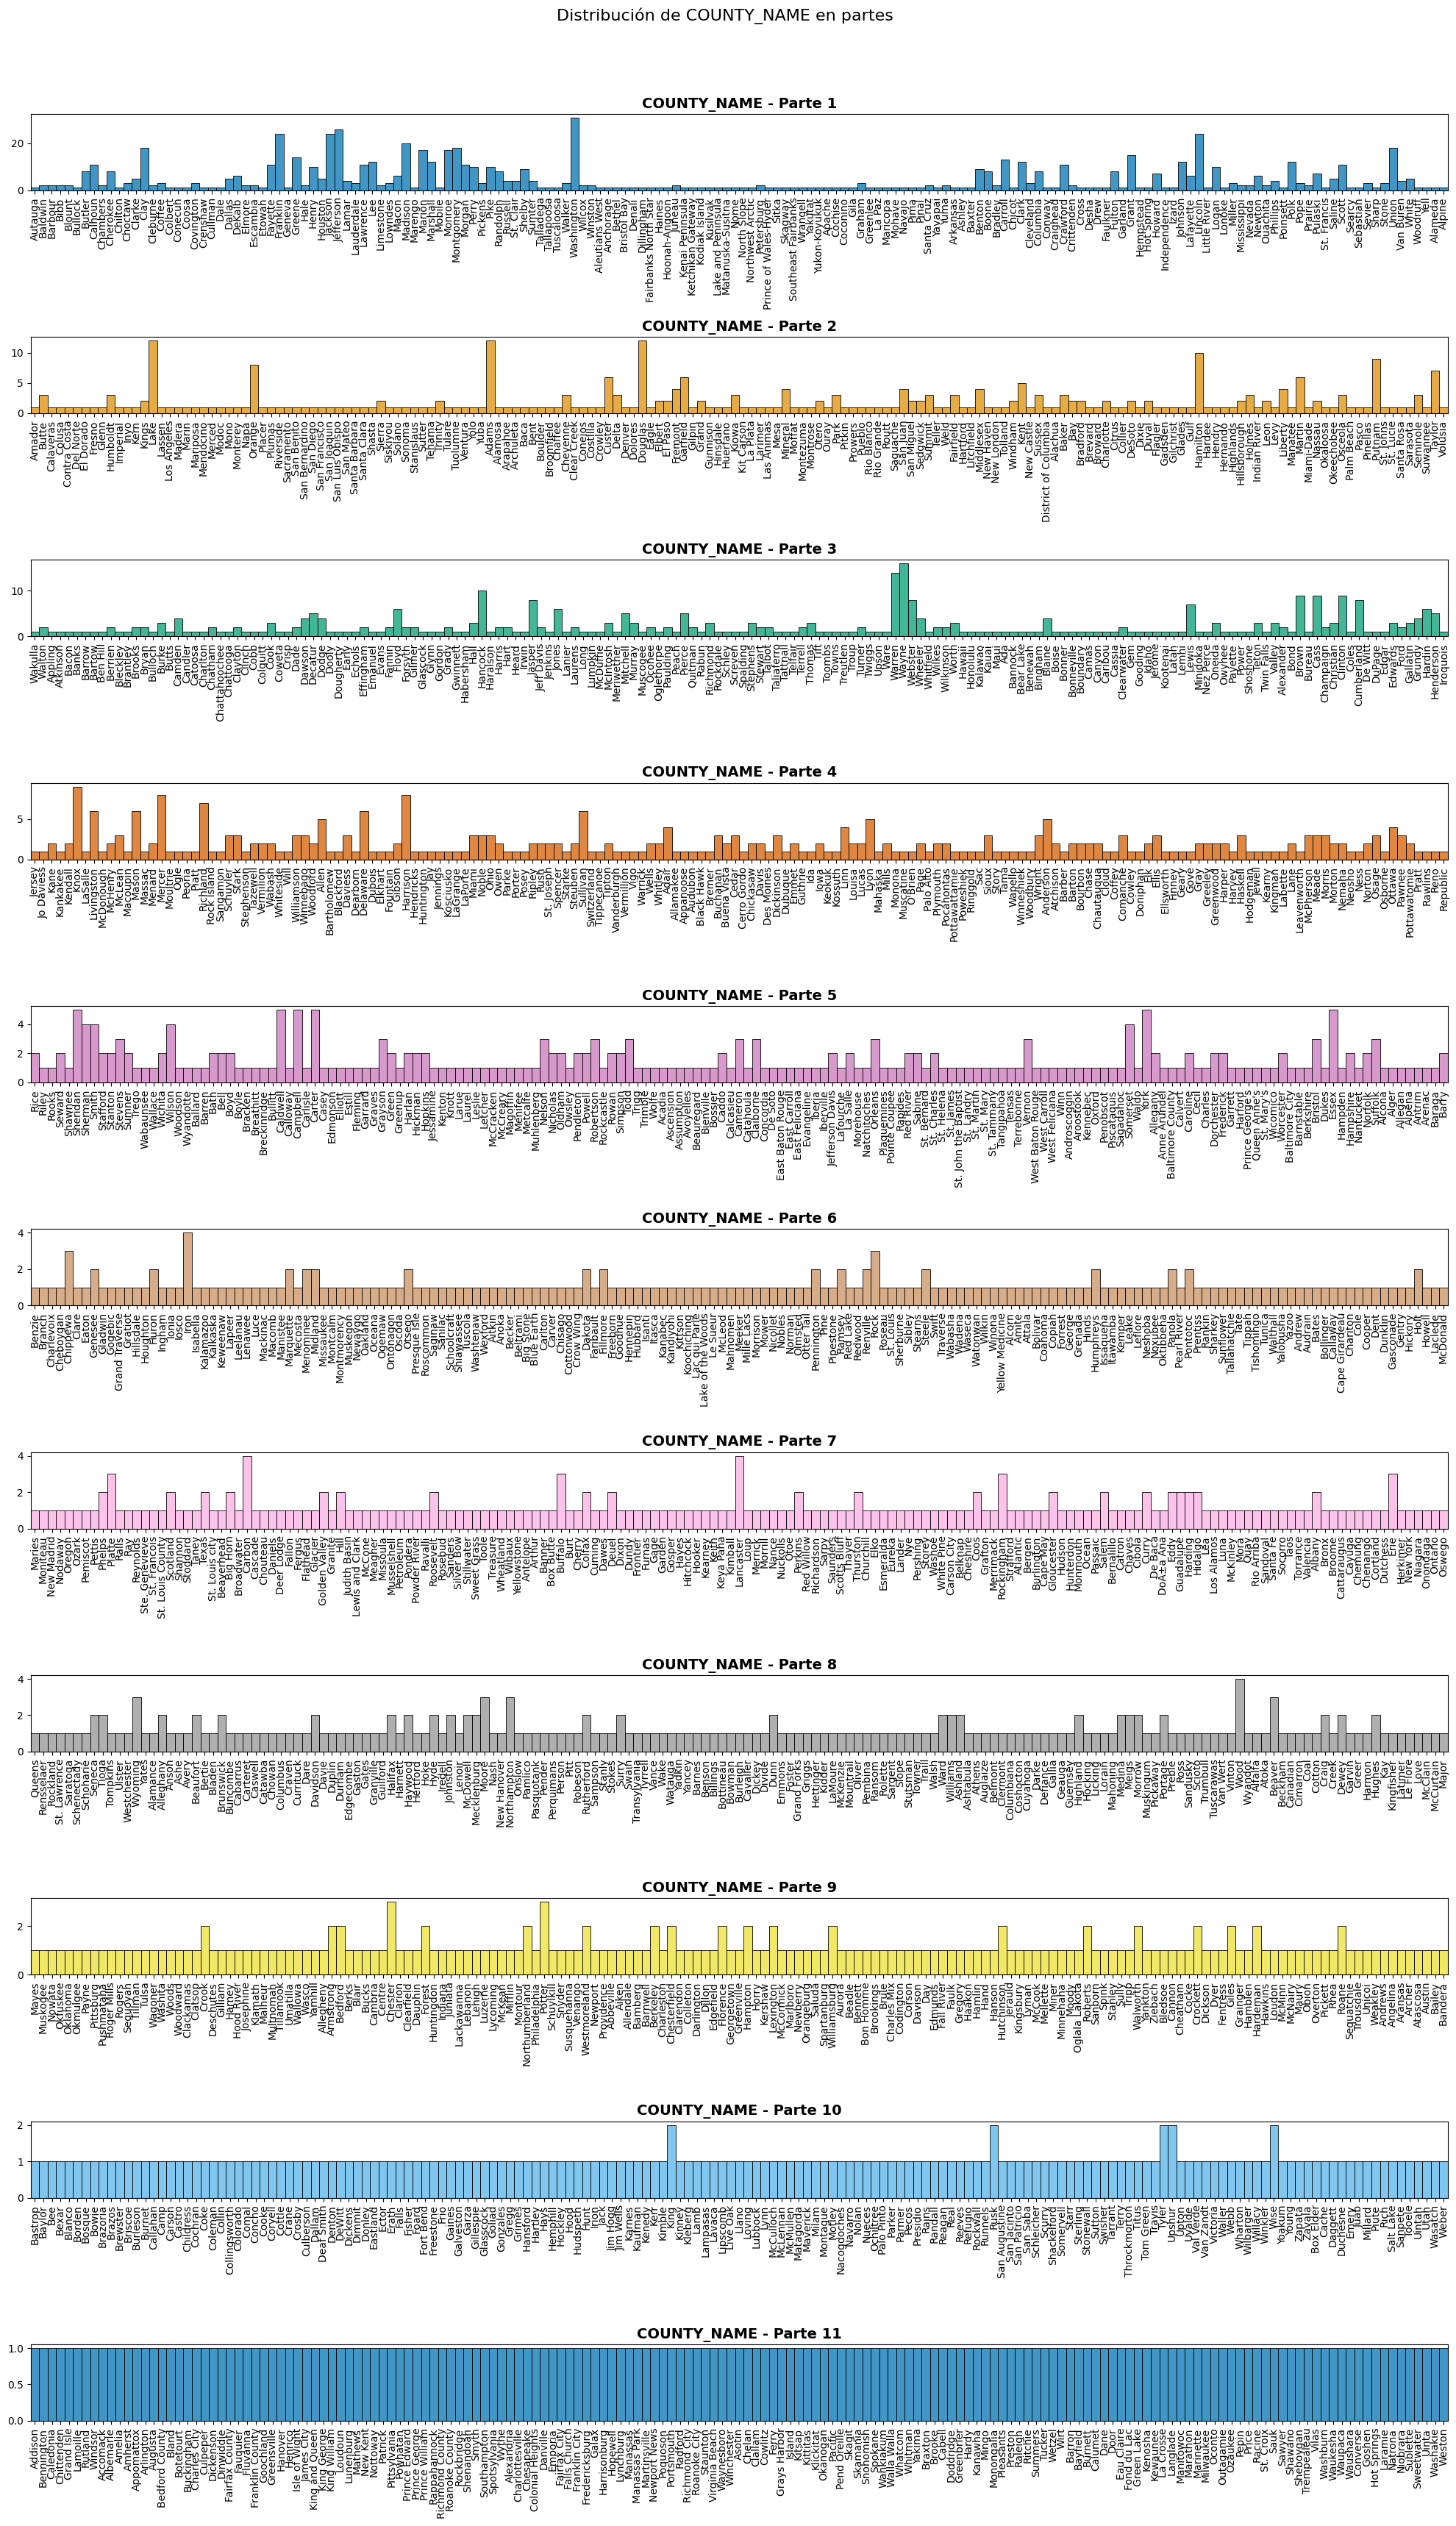

In [11]:
county_names = df_cat['COUNTY_NAME'].unique()
num_particiones = 11
divisiones = np.array_split(county_names, num_particiones)

fig, axis = plt.subplots(num_particiones, 1, figsize=(20, 35))
fig.suptitle("Distribución de COUNTY_NAME en partes", fontsize=16)

colores = sns.color_palette("colorblind", num_particiones)

for i, division in enumerate(divisiones):
    subset = df_cat[df_cat['COUNTY_NAME'].isin(division)]
    ax = axis[i]
    sns.histplot(data=subset, x="COUNTY_NAME", ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(f"COUNTY_NAME - Parte {i+1}", fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    ax.margins(x=0)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

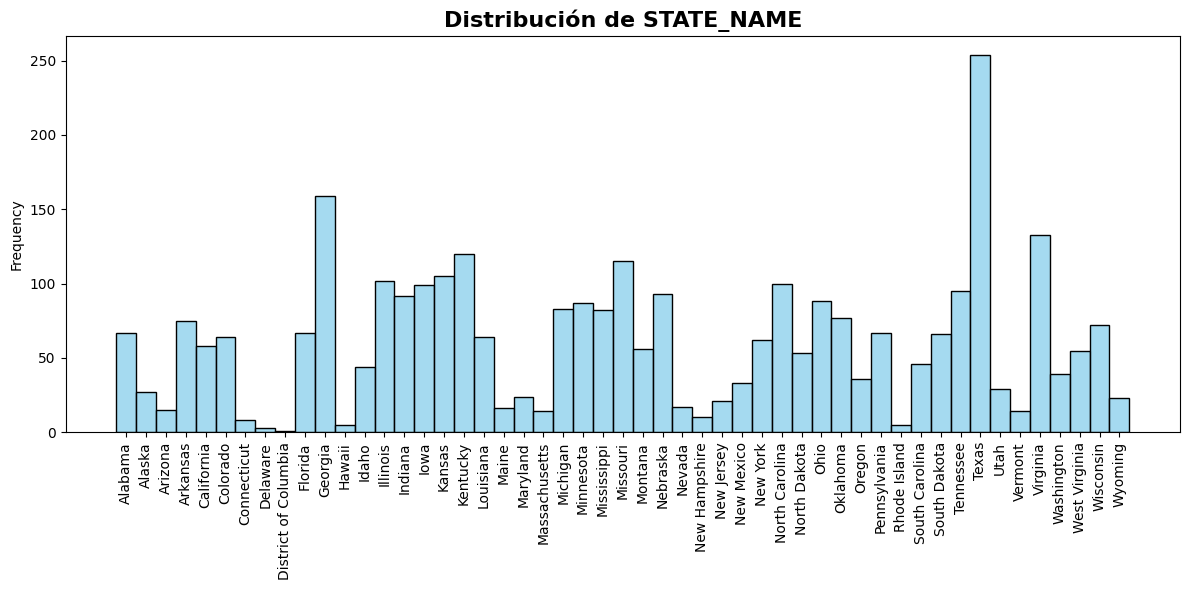

In [12]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df_cat, x="STATE_NAME", color="skyblue").set(xlabel=None, ylabel="Frequency")
plt.title("Distribución de STATE_NAME", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Analisis

# 3.3 Numerical Variable Analysis

In [13]:
df_num.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


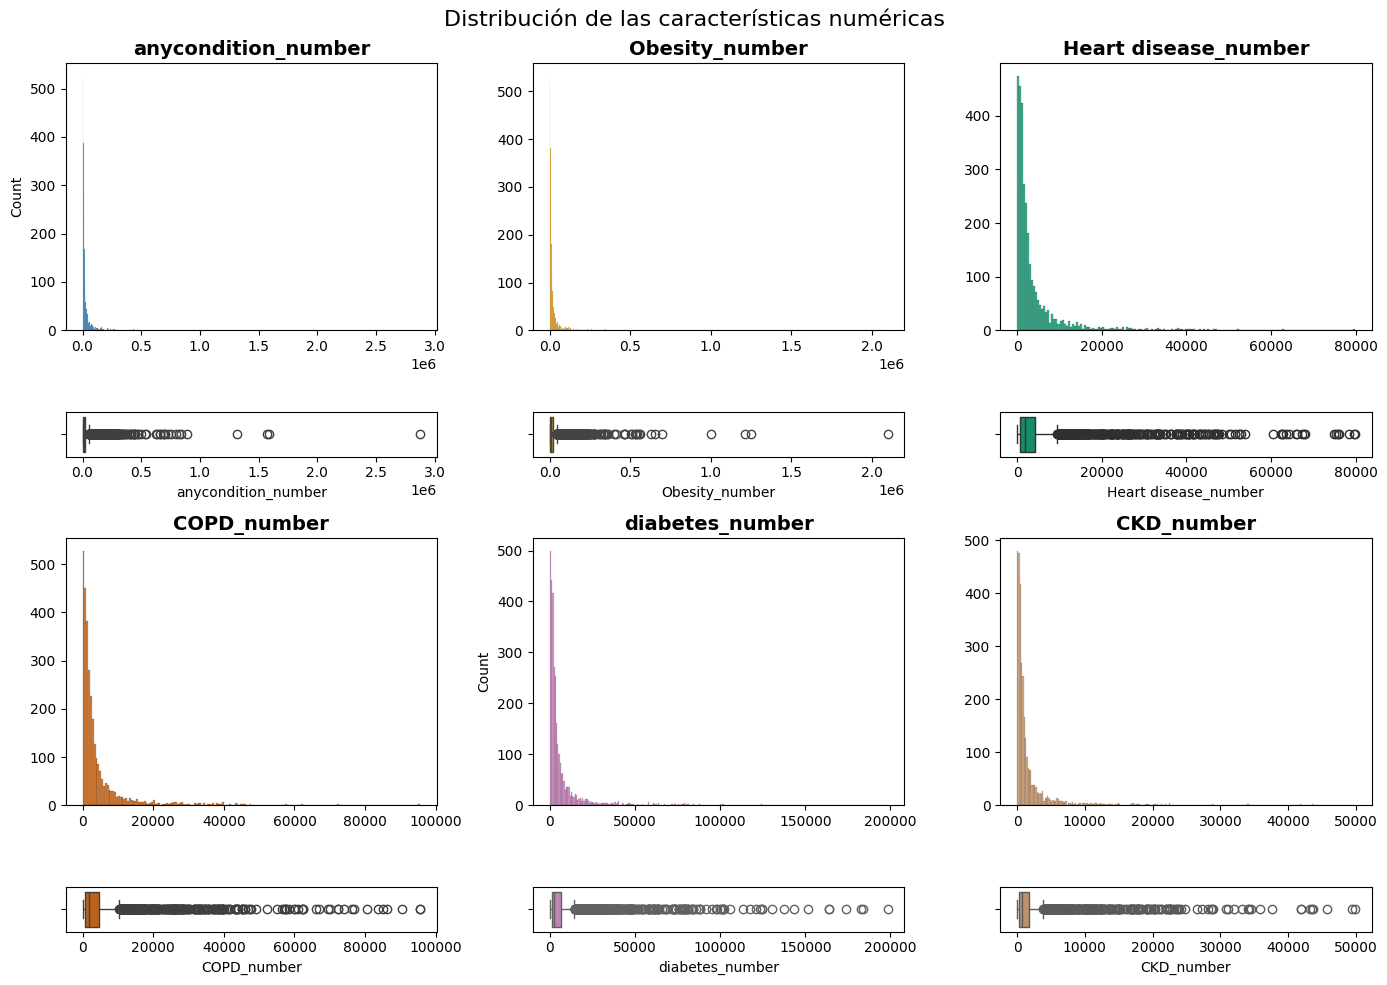

In [15]:
#Analisis con histogramas y boxplot de las características numéricas
fig, axis = plt.subplots(4, 3, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = df_num, x = "anycondition_number").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_num, x = "anycondition_number")

sns.histplot(ax = axis[0, 1], data = df_num, x = "Obesity_number", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_num, x = "Obesity_number", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df_num[df_num["Heart disease_number"] < 80000], x = "Heart disease_number", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df_num[df_num["Heart disease_number"] < 80000], x = "Heart disease_number", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[2, 0], data = df_num[df_num["COPD_number"] < 100000], x = "COPD_number", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df_num[df_num["COPD_number"] < 100000], x = "COPD_number", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 1], data = df_num[df_num["diabetes_number"] < 200000], x = "diabetes_number", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df_num[df_num["diabetes_number"] < 200000], x = "diabetes_number", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 2], data = df_num[df_num["CKD_number"] < 50000], x = "CKD_number", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = df_num[df_num["CKD_number"] < 50000], x = "CKD_number", color=sns.color_palette("colorblind")[5])

axis[0, 0].set_title("anycondition_number", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Obesity_number", fontsize=14, fontweight='bold')
axis[0, 2].set_title("Heart disease_number", fontsize=14, fontweight='bold')
axis[2, 0].set_title("COPD_number", fontsize=14, fontweight='bold')
axis[2, 1].set_title("diabetes_number", fontsize=14, fontweight='bold')
axis[2, 2].set_title("CKD_number", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Analisis

# 4. Multivariate Analysis